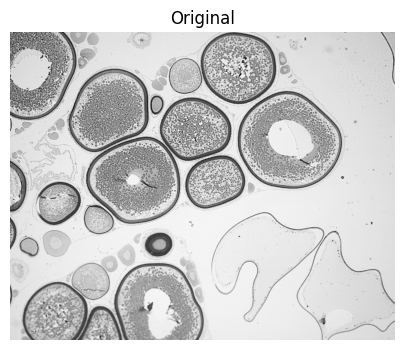

In [1]:
import cv2 as cv
from matplotlib import pyplot as plt

def visualize(name, img):
    plt.figure(figsize=(6,4))
    plt.title(name)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

img = cv.imread("07M080_A_IEO.jpg", cv.IMREAD_GRAYSCALE)
visualize('Original',img)


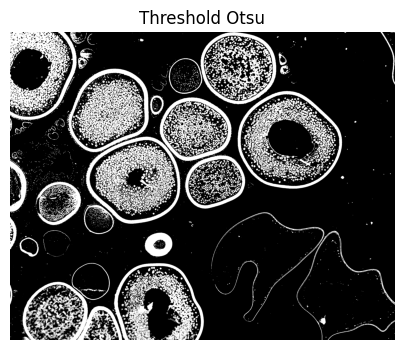

Threshold Otsu method:  168.0


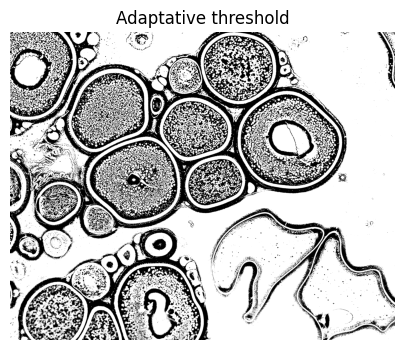

In [2]:
# global thresholding
k, dst= cv.threshold(img,0,255,cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
visualize('Threshold Otsu', dst)
print('Threshold Otsu method: ', k)
# adaptative threshold
# window size use to calculate the local thresholds
neighboursSize=101 # odd number
# offset added or substracted from the mean value to
# discriminate between foreground and background
offset=-10 # depends on the application
binary = cv.adaptiveThreshold(img, 255,cv.ADAPTIVE_THRESH_MEAN_C, \
                              cv.THRESH_BINARY_INV, neighboursSize, offset)
visualize('Adaptative threshold', binary)

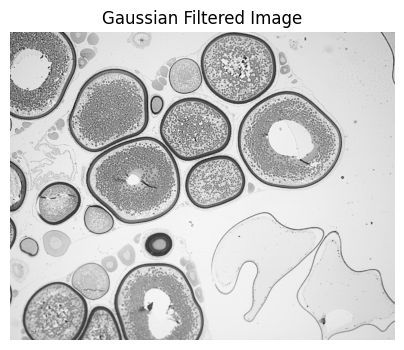

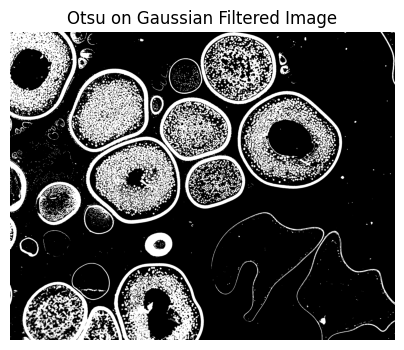

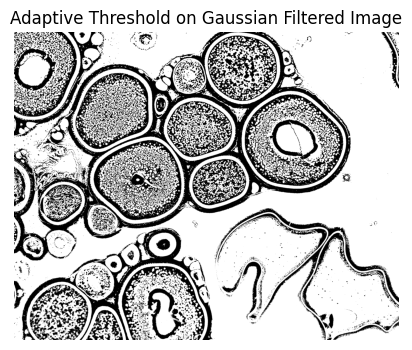

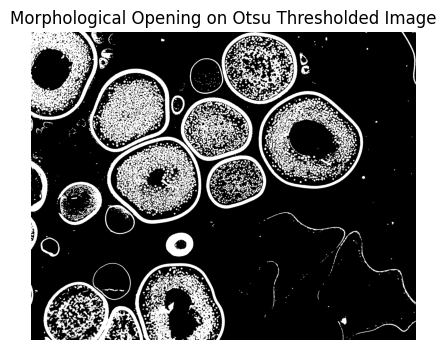

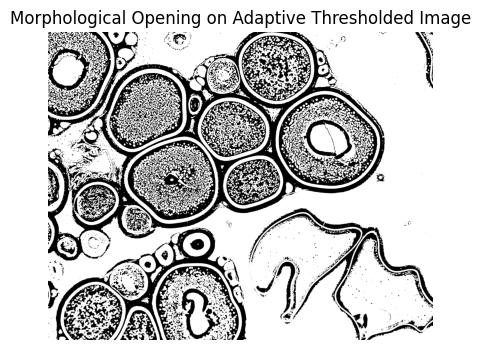

In [3]:
# gaussian filter
img_gaussian = cv.GaussianBlur(img, (5, 5), 0)
visualize('Gaussian Filtered Image', img_gaussian)

# Otsu's thresholding on Gaussian
k_gaussian, dst_gaussian = cv.threshold(img_gaussian, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
visualize('Otsu on Gaussian Filtered Image', dst_gaussian)

# adaptive thresholding on the Gaussian
binary_gaussian = cv.adaptiveThreshold(img_gaussian, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, neighboursSize, offset)
visualize('Adaptive Threshold on Gaussian Filtered Image', binary_gaussian)

#  morphological openingto remove small objects
kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
opening_otsu = cv.morphologyEx(dst_gaussian, cv.MORPH_OPEN, kernel)
opening_adaptive = cv.morphologyEx(binary_gaussian, cv.MORPH_OPEN, kernel)


visualize('Morphological Opening on Otsu Thresholded Image', opening_otsu)
visualize('Morphological Opening on Adaptive Thresholded Image', opening_adaptive)


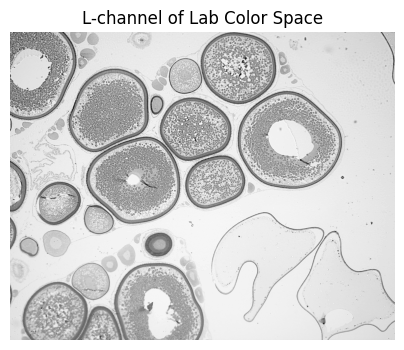

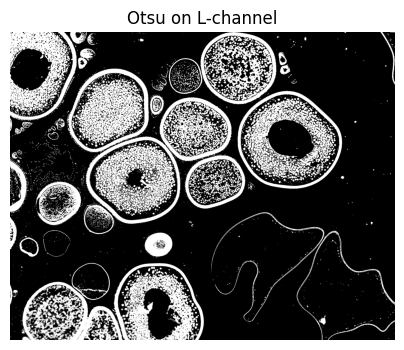

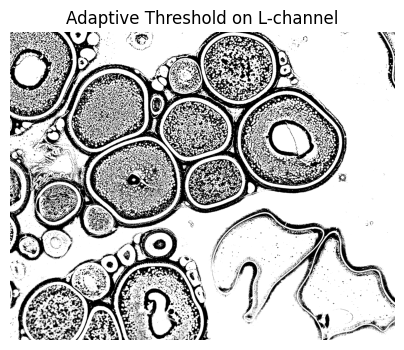

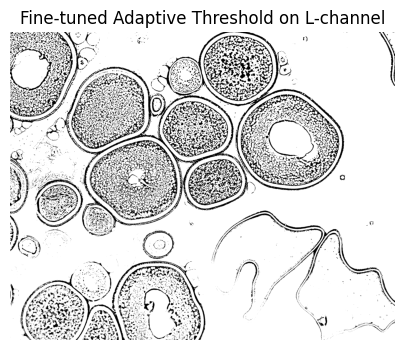

In [4]:
img_lab = cv.cvtColor(cv.imread("07M080_A_IEO.jpg"), cv.COLOR_BGR2Lab)
L_channel = img_lab[:, :, 0]

# L-channel
visualize('L-channel of Lab Color Space', L_channel)

k_L_channel, dst_L_channel = cv.threshold(L_channel, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
visualize('Otsu on L-channel', dst_L_channel)

binary_L_channel = cv.adaptiveThreshold(L_channel, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, neighboursSize, offset)
visualize('Adaptive Threshold on L-channel', binary_L_channel)

new_neighboursSize = 51  # smaller window size
new_offset = -20  # adjust offset to control thresholding

binary_fine_tuned = cv.adaptiveThreshold(L_channel, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, new_neighboursSize, new_offset)
visualize('Fine-tuned Adaptive Threshold on L-channel', binary_fine_tuned)


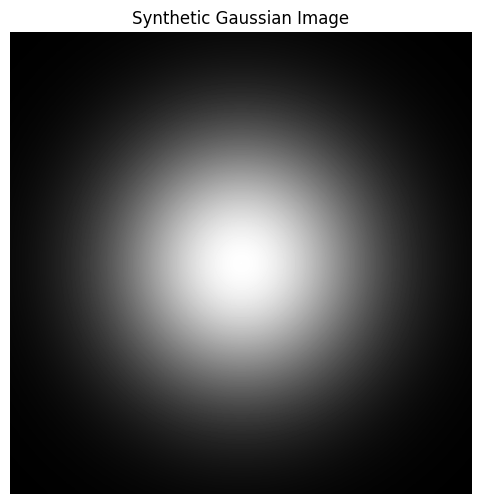

In [5]:
import numpy as np
# Task 1: create a synthetic image
N = 256
sigma = 100
ind = np.arange(-N, N, 1)
[X, Y] = np.meshgrid(ind, ind)
src = np.exp(-(X**2 + Y**2) / (2 * sigma * sigma))
img = np.uint8(src * 255)
cv.imwrite('gaussianImage.jpg', img)
plt.figure(figsize=(6,6))
plt.title('Synthetic Gaussian Image')
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

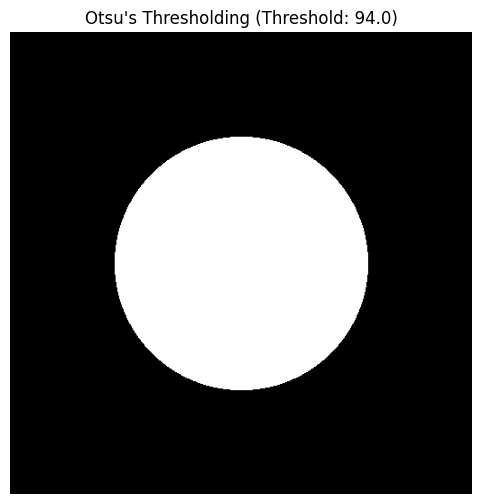

In [6]:
# task 2: apply Otsu
k, otsu_segmented = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)


plt.figure(figsize=(6,6))
plt.title(f"Otsu's Thresholding (Threshold: {k})")
plt.imshow(otsu_segmented, cmap='gray')
plt.axis('off')
plt.show()

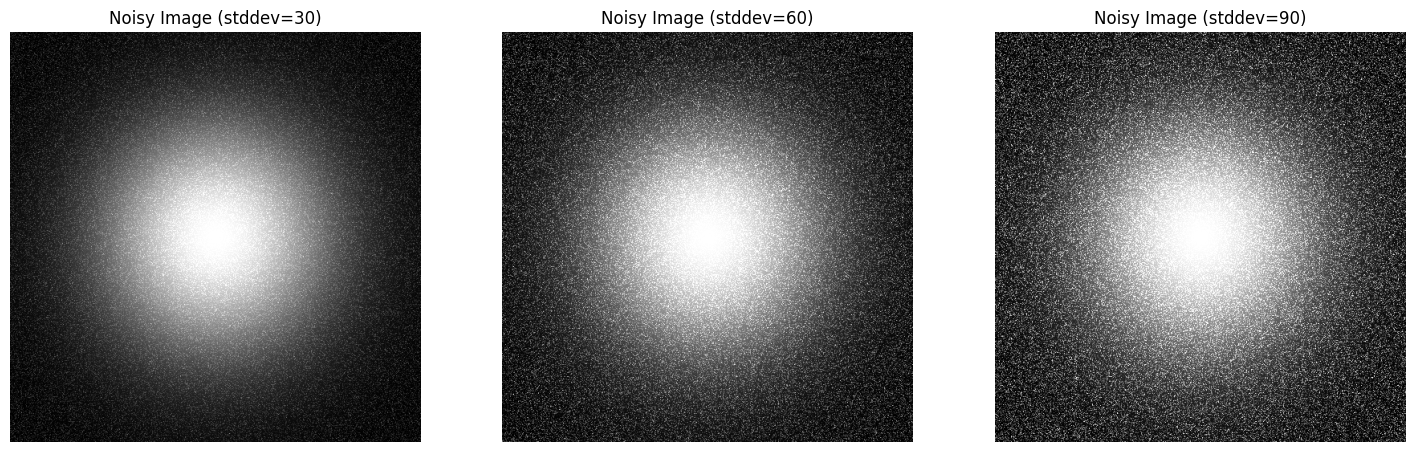

In [7]:
# task 3: add noise with different standard deviations

def add_noise(img, stddev):
    noise = np.zeros(img.shape, np.uint8)
    cv.randn(noise, 0, stddev)  # mean = 0, stddev varies
    noisy_img = cv.add(img, noise)
    return noisy_img

# add noise with different standard deviations (e.g., 30, 60, 90)
std_devs = [30, 60, 90]
noisy_images = [add_noise(img, stddev) for stddev in std_devs]

fig, axs = plt.subplots(1, 3, figsize=(18,6))
for i, noisy_img in enumerate(noisy_images):
    axs[i].imshow(noisy_img, cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f'Noisy Image (stddev={std_devs[i]})')

plt.show()

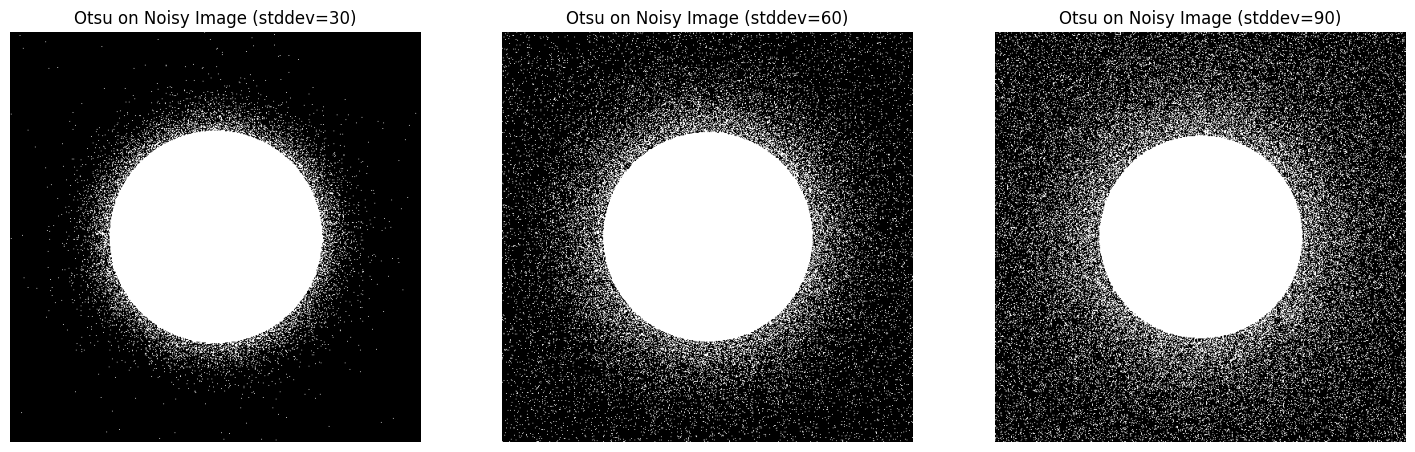

In [8]:
# task 4: apply Otsu

otsu_noisy_images = [cv.threshold(noisy_img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)[1] for noisy_img in noisy_images]

fig, axs = plt.subplots(1, 3, figsize=(18,6))
for i, otsu_img in enumerate(otsu_noisy_images):
    axs[i].imshow(otsu_img, cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f'Otsu on Noisy Image (stddev={std_devs[i]})')

plt.show()

Low Noise (stddev = 30): The segmented image is close to the original Otsu's thresholding result, but small speckles of noise start to appear around the circular region. The segmentation is still reasonably clean.

Medium Noise (stddev = 60): More noise appears, especially around the circular boundary. The segmentation starts to degrade as the noise spreads, and the boundary of the circle becomes less defined.

High Noise (stddev = 90): The highest amount of noise makes the boundary even more difficult to detect. The circle's edges are blurred due to the noise, and the segmentation is highly affected by noise throughout the image.

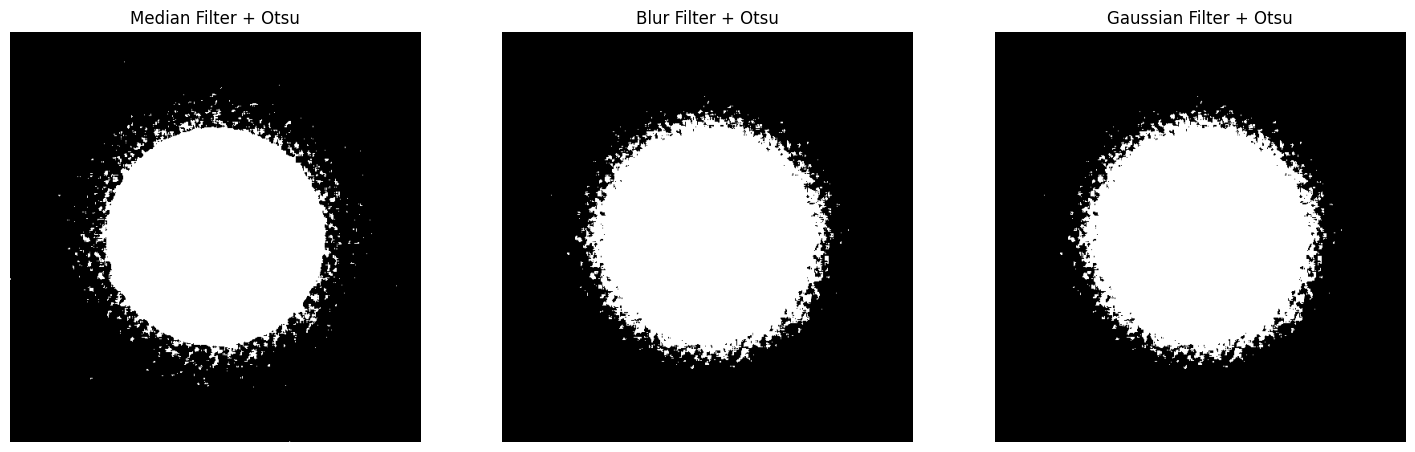

In [9]:
# task 5: pre-process the noisy images using filters and re-apply Otsu's thresholding

# apply median, blur, and gaussian noisy image with stddev = 90
median_filtered = cv.medianBlur(noisy_images[2], 5)
blur_filtered = cv.blur(noisy_images[2], (5, 5))
gaussian_filtered = cv.GaussianBlur(noisy_images[2], (5, 5), 5)

# apply Otsu
otsu_median = cv.threshold(median_filtered, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)[1]
otsu_blur = cv.threshold(blur_filtered, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)[1]
otsu_gaussian = cv.threshold(gaussian_filtered, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)[1]

fig, axs = plt.subplots(1, 3, figsize=(18,6))
axs[0].imshow(otsu_median, cmap='gray')
axs[0].set_title('Median Filter + Otsu')
axs[0].axis('off')

axs[1].imshow(otsu_blur, cmap='gray')
axs[1].set_title('Blur Filter + Otsu')
axs[1].axis('off')

axs[2].imshow(otsu_gaussian, cmap='gray')
axs[2].set_title('Gaussian Filter + Otsu')
axs[2].axis('off')

plt.show()

Median Filter + Otsu:

The median filter has significantly reduced the noise but introduces slight edge distortions, resulting in a more uneven boundary around the circle. However, the interior remains clean.
Blur Filter + Otsu:

The blur filter effectively smooths the image but introduces more noise at the boundary of the circle. The circular shape is well-preserved, but some residual noise remains around the edges.
Gaussian Filter + Otsu:

The Gaussian filter offers the best balance between noise reduction and edge preservation. The boundary is smoother, and the interior of the circle is mostly clean. This filter seems to handle the noise better than the other two methods for this image.


In [10]:
import pandas as pd

def calculate_metrics(imgTrue, imgPrediction):
    imgTrue = imgTrue.astype(np.uint8)
    imgPrediction = imgPrediction.astype(np.uint8)

    # True Negative (TN)
    c11 = np.count_nonzero((imgTrue == 0) & (imgTrue == imgPrediction))
    # True Positive (TP)
    c22 = np.count_nonzero((imgTrue == 255) & (imgTrue == imgPrediction))
    # False Positive (FP)
    c12 = np.count_nonzero((imgTrue == 0) & (imgTrue != imgPrediction))
    # False Negative (FN)
    c21 = np.count_nonzero((imgTrue == 255) & (imgTrue != imgPrediction))


    cmatrix = np.array([[c11, c12], [c21, c22]])

    s = np.sum(cmatrix)
    pa = np.trace(cmatrix)
    pe = 0
    for i in range(cmatrix.shape[0]):
        pe += np.sum(cmatrix[:, i]) * np.sum(cmatrix[i, :]) / s
    accuracy = 100 * pa / s
    kappa = 100 * (pa - pe) / (s - pe)
    recall = c22 / (c21 + c22)
    precision = c22 / (c12 + c22)
    f1 = 2 * precision * recall / (precision + recall)
    iou = c22 / (c22 + c12 + c21)

    return accuracy, kappa, precision, recall, f1, iou


metrics_median_detailed = calculate_metrics(otsu_segmented, otsu_median)
metrics_blur_detailed = calculate_metrics(otsu_segmented, otsu_blur)
metrics_gaussian_detailed = calculate_metrics(otsu_segmented, otsu_gaussian)

detailed_results = {
    'Filter': ['Median', 'Blur', 'Gaussian'],
    'Accuracy': [metrics_median_detailed[0], metrics_blur_detailed[0], metrics_gaussian_detailed[0]],
    'Kappa': [metrics_median_detailed[1], metrics_blur_detailed[1], metrics_gaussian_detailed[1]],
    'Precision': [metrics_median_detailed[2], metrics_blur_detailed[2], metrics_gaussian_detailed[2]],
    'Recall': [metrics_median_detailed[3], metrics_blur_detailed[3], metrics_gaussian_detailed[3]],
    'F1 Score': [metrics_median_detailed[4], metrics_blur_detailed[4], metrics_gaussian_detailed[4]],
    'IoU': [metrics_median_detailed[5], metrics_blur_detailed[5], metrics_gaussian_detailed[5]]
}

df_detailed_results = pd.DataFrame(detailed_results)

df_detailed_results


Filter   Accuracy      Kappa  Precision    Recall  F1 Score       IoU
0    Median  97.518921  93.219095   0.931891  0.965771  0.948529  0.902097
1      Blur  97.198486  92.470076   0.906004  0.983707  0.943258  0.892610
2  Gaussian  97.189331  92.445469   0.905826  0.983514  0.943073  0.892278